# 3주차 과제

## 1. 불균형한 레이블 데이터 세트에서 정확도를 성능 수치로 사용해서는 안되는 이유?

많이 치우친 데이터의 예측 결과를 더 쉽게 얻을 수 있고, 이를 정확도에서 예측한 결과로 포함시킬 수 있기 때문에

## 2. 정밀도란?/정밀도가 중요 지표로 간주되는 경우  

1) 정밀도(precision) : 예측을 positive로 한 대상 중에서 예측과 실제 값이 positive로 일치한 데이터의 비율

2) 실제 Negative data 예측을 positive로 잘못 판단하게 되면 업무상 큰 영향을 줄 때  e.g. 스팸메일함

## 3. 재현율이란?/재현율이 중요 지표로 간주되는 경우

1) 재현율(recall) : 실제값을 positive로 한 대상 중에서 예측과 실제 값이 positive로 일치한 데이터의 비율

2) 실제 Positive data 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향을 줄 때  e.g. 암 환자

## 4. 아래 임계값이 다른 두 오차 행렬이 있다. 임계값이 더 높은 오차 행렬은 무엇인가?
##    임계값이 증가할 때 정밀도/재현율은 어떻게 변하는가?
![image](https://user-images.githubusercontent.com/78632348/134499262-db2ee75d-ee29-4bb5-be65-c63914523f21.png)

Recall_of_a = 48/(2+48)

Recall_of_b = 43/(7+43)

Recall_of_a > Recall_of_b -> a의 임계값(Threshold)가 더 낮다.

임계값(Threshold) 증가시 재현율(recall) 감소 & 정밀도(precision) 증가

## 5. FPR이란?/임계값이 0, 1일때의 FPR?


* FPR (False Positive Rate) = 1 - TNR(특이성) = 실제 False인 값들 중에 FP(실제로 Negative인데 positive로 예측한 경우)
* FPR = 0 at 임계값(Threshold) = 1
* FPR = 1 at 임계값(Threshold) = 0



## 6. 아래 결정 트리 모델에 대하여
![image](https://user-images.githubusercontent.com/78632348/134470144-d15d80ce-b472-4cf8-9dd4-5238ce08480d.png)


## 6-1. 아래 이미지는 max_depth=x로 변경하였다. x=?
![image](https://user-images.githubusercontent.com/78632348/134505196-db08ba20-484c-48b8-87b1-aa6afab96260.png)

max_depth = 3

## 6.2 아래 이미지는 min_samples_split=x로 변경하였다. x=?
![image](https://user-images.githubusercontent.com/78632348/134505384-07d3298c-7e87-4a88-bfa0-8c505df17b15.png)

x=9

## 6-3. 아래 이미지는 min_samples_leaf=x로 변경하였다. x=?
![image](https://user-images.githubusercontent.com/78632348/134505508-2db172b3-d94c-4d3d-9e0a-5b23d43ac6da.png)

x = 3

## 7. 첨부된 데이터(심장병 예측 데이터)로 로지스틱 회귀를 이용해 예측 모델 생성 후 성능 수치가 좋은 적절한 임계값을 찾고 정확도/정밀도/재현율/F1 스코어/ROC AUC 값을 구하시오.
### (재현율/정밀도 곡선 그래프와, ROC 곡선 그래프도 그릴 것)



## 데이터 정보
### Heart Disease UCI
### 1. age
### 2. sex
### 3. chest pain type (4 values)
### 4. resting blood pressure
### 5. serum cholestoral in mg/dl
### 6. fasting blood sugar > 120 mg/dl
### 7. resting electrocardiographic results (values 0,1,2)
### 8. maximum heart rate achieved
### 9. exercise induced angina
### 10. oldpeak = ST depression induced by exercise relative to rest
### 11. the slope of the peak exercise ST segment
### 12. number of major vessels (0-3) colored by flourosopy
### 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
### 14. target : 1=heart disease, 0= normal

### 출처 : https://www.kaggle.com/ronitf/heart-disease-uci

In [66]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

heart_df = pd.read_csv('./drive/MyDrive/Colab_Notebooks/heart.csv')
print(heart_df['target'].value_counts())
heart_df.head(3)

1    165
0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
heart_df.info( )

In [68]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [69]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)
print(X_train.shape)
print(y_train.shape)
# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

(242, 13)
(242,)
오차 행렬
[[23  5]
 [ 5 28]]
정확도: 0.8361, 정밀도: 0.8485, 재현율: 0.8485,    F1: 0.8485, AUC:0.9167


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


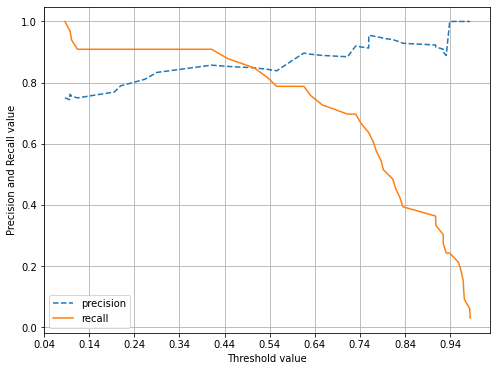

In [70]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [58]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([147.,   0.,   0.,   0.,   0., 152.,   0.,   0.,   0.,   4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

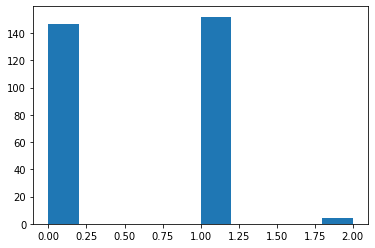

In [59]:
plt.hist(heart_df['restecg'], bins=10)

In [60]:

# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# 전체 데이터 건수
total_count = heart_df['sex'].count()
print(total_count)
# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = heart_df[heart_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

303
sex 0 건수는 96, 퍼센트는 31.68 %
cp 0 건수는 143, 퍼센트는 47.19 %
fbs 0 건수는 258, 퍼센트는 85.15 %
restecg 0 건수는 147, 퍼센트는 48.51 %
exang 0 건수는 204, 퍼센트는 67.33 %
oldpeak 0 건수는 99, 퍼센트는 32.67 %
slope 0 건수는 21, 퍼센트는 6.93 %
ca 0 건수는 175, 퍼센트는 57.76 %
thal 0 건수는 2, 퍼센트는 0.66 %
target 0 건수는 138, 퍼센트는 45.54 %


In [71]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
heart_df[zero_features]=heart_df[zero_features].replace(0, heart_df[zero_features].mean())

In [72]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.899618,1.423368,131.623762,246.264026,0.274973,0.784237,149.646865,0.546711,1.379277,1.496324,1.150628,2.328802,0.792569
std,9.082101,0.147647,0.642960,17.538143,51.830751,0.303297,0.273777,22.905161,0.316297,0.937039,0.483875,0.747938,0.582411,0.227192
min,29.000000,0.683168,0.966997,94.000000,126.000000,0.148515,0.528053,71.000000,0.326733,0.100000,1.000000,0.729373,1.000000,0.544554
25%,47.500000,0.683168,0.966997,120.000000,211.000000,0.148515,0.528053,133.500000,0.326733,1.000000,1.000000,0.729373,2.000000,0.544554
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.148515,1.000000,153.000000,0.326733,1.039604,1.399340,0.729373,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.148515,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [74]:
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)
print(y_train.shape)
print(X_train.shape)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

(242,)
(242, 13)


ValueError: ignored

In [63]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [64]:

thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

NotFittedError: ignored

In [65]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

IndexError: ignored